In [483]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from yellowbrick.model_selection import LearningCurve 
from yellowbrick.classifier import ROCAUC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import recall_score, precision_score
import pyproj
import folium 
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')


# 1. Analyse exploratoire des données

In [484]:
#Importation du jeu de données
valeur_manquante = ['?', ' ']
data = pd.read_csv('donnees.csv',na_values = valeur_manquante)
pd.set_option('display.max_columns',None)
data.head()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,IDENTIFIANTPLU,INTITULEPROTECTIONPLU,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,RAISONDEPLANTATION,REMARQUES,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,STADEDEVELOPPEMENTDIAG,TRAITEMENTCHENILLES,TRAVAUXPRECONISESDIAG,TROTTOIR,TYPEIMPLANTATIONPLU,VARIETE,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014.0,2019.0,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,Alnus,NaN,NaN,Arbre davenir normal,plus de 20 ans,Remplacement,NaN,ESP151,Arbre de voirie,Arbre jeune,Arbre jeune,NaN,Controle,non,NaN,NaN,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013.0,NaN,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,Platanus,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,NaN,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,NaN,non,NaN,NaN,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
2,3,2004,NaN,2014.0,ESP26205,ESP635,Pl R Frappat ang Eaux Claires,10 à 20 cm,grandiflora,passages fréquents ou arrêts,Magnolia,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,NaN,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre adulte,NaN,Controle,oui,NaN,NaN,vigoureux,1.913087e+06,4.223524e+06,0,0,0,0,0
3,2,2004,2014.0,2014.0,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,Sophora,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,Enormément de grosses branches cassées,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,Taille mise en sécurité,oui,NaN,NaN,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013.0,NaN,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,Fraxinus,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,NaN,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,NaN,oui,NaN,NaN,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0


In [485]:
df = data.copy()

In [179]:

df.shape

(15375, 34)

In [78]:
df.dtypes.value_counts()

object     22
int64       7
float64     5
dtype: int64

In [79]:
# types de variables 

# qualitatives mais codés numériquement: ADR_SECTEUR, DEFAUT, Collet , Houppier, Racine et tronc

# types int mais codés comme float : ANNEEREALISATIONDIAGNOSTIC, ANNEETRAVAUXPRECONISESDIAG

# autres qualitatives mais codés numériquement : ANNEEDEPLANTATION,  ANNEEREALISATIONDIAGNOSTIC,
#                                                 ANNEETRAVAUXPRECONISESDIAG

df.dtypes

ADR_SECTEUR                     int64
ANNEEDEPLANTATION               int64
ANNEEREALISATIONDIAGNOSTIC    float64
ANNEETRAVAUXPRECONISESDIAG    float64
CODE                           object
CODE_PARENT                    object
CODE_PARENT_DESC               object
DIAMETREARBREAUNMETRE          object
ESPECE                         object
FREQUENTATIONCIBLE             object
GENRE_BOTA                     object
IDENTIFIANTPLU                float64
INTITULEPROTECTIONPLU          object
NOTEDIAGNOSTIC                 object
PRIORITEDERENOUVELLEMENT       object
RAISONDEPLANTATION             object
REMARQUES                      object
SOUS_CATEGORIE                 object
SOUS_CATEGORIE_DESC            object
STADEDEDEVELOPPEMENT           object
STADEDEVELOPPEMENTDIAG         object
TRAITEMENTCHENILLES            object
TRAVAUXPRECONISESDIAG          object
TROTTOIR                       object
TYPEIMPLANTATIONPLU            object
VARIETE                        object
VIGUEUR     

In [80]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

RAISONDEPLANTATION            0.985041
INTITULEPROTECTIONPLU         0.976520
IDENTIFIANTPLU                0.976520
TYPEIMPLANTATIONPLU           0.976520
TRAITEMENTCHENILLES           0.929236
VARIETE                       0.859317
REMARQUES                     0.726894
TRAVAUXPRECONISESDIAG         0.294309
ANNEETRAVAUXPRECONISESDIAG    0.293398
ESPECE                        0.066211
PRIORITEDERENOUVELLEMENT      0.008260
DIAMETREARBREAUNMETRE         0.004358
STADEDEDEVELOPPEMENT          0.003317
NOTEDIAGNOSTIC                0.002602
STADEDEVELOPPEMENTDIAG        0.000846
VIGUEUR                       0.000715
ANNEEREALISATIONDIAGNOSTIC    0.000520
FREQUENTATIONCIBLE            0.000065
Racine                        0.000000
coord_x                       0.000000
coord_y                       0.000000
Houppier                      0.000000
DEFAUT                        0.000000
Collet                        0.000000
ADR_SECTEUR                   0.000000
SOUS_CATEGORIE           

In [486]:
def testQuant(num): 
    # entrée : num (numéro de la colonne de la variable quantitative étudiée)
    # sortie : le résultat du test d'Anova de cette variable avec la cible
    data = pd.DataFrame({"x": df.iloc[:,num].values,"y" : df["DEFAUT"].astype("category").values})
    data = data.dropna()
    x, y = data.iloc[:,0].values.reshape(-1,1), data.iloc[:,1].values
    test_anova = f_classif(x,y)
    return pd.DataFrame({"F-stattistic" : test_anova[0], "P-value" : test_anova[1]},
                       index = [df.columns[num]]) 
    

def testQuali(num):
    # entrée : num (numéro de la colonne de la variable qualitative étudiée)
    # sortie : le résultat du test de chi2 de cette variable avec la cible
    data = pd.DataFrame({"x": LabelEncoder().fit_transform(df.iloc[:,num].values),"y" : df["DEFAUT"].values})
    data = data.dropna()
    x, y = data["x"].astype("category").values.reshape(-1,1), data["y"].astype("category").values
    test = chi2(x,y)
    return pd.DataFrame({"Chi2 stattistic" : test[0], "P-value" : test[1]},
                       index = [df.columns[num]]) 

def contingence(num):
    # entrée : num (numéro de la colonne de la variable qualitative étudiée)
    # sortie : table de contingence avec la cible
    
    return pd.crosstab(df.iloc[:,num].astype("category"),df["DEFAUT"].astype("category"),margins= False)

def descripQuali(num) :
    # entrée : num (numéro de la colonne de la variable qualitative étudiée)
    # sortie : le résultat de la description de cette variable
    return df.iloc[:,num].astype("category").describe() 

def descripQuant(num) :
    # entrée : num (numéro de la colonne de la variable quantitative étudiée)
    # sortie : le résultat de la description de cette variable
    return df.iloc[:,num].describe()   

def graphique(num) :
    # entrée : num (numéro de la colonne de la variable qualitative étudiée)
    # sortie : effectif de chaque modalité dans les arbres avec ou sans défaut
    return pd.crosstab(df[df.columns[num]].astype("category"),df["DEFAUT"].astype("category")).plot(
                       kind='bar',ylabel ='effectif')       
    
    

### adresse secteur : à conserver

<AxesSubplot:xlabel='ADR_SECTEUR', ylabel='effectif'>

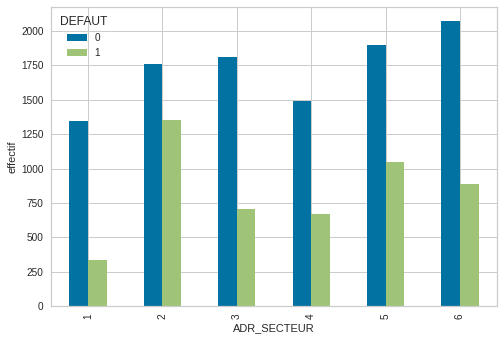

In [88]:
graphique(0)

In [82]:
descripQuali(0)
# il y'a 15375 - 15375 = 0 valeur manquante
# il y'a 6 secteurs distincts 
# le secteur le plus majoritaire est le secteur 2 et apparait 3113 fois

count     15375
unique        6
top           2
freq       3113
Name: ADR_SECTEUR, dtype: int64

In [83]:
contingence(0)

DEFAUT,0,1
ADR_SECTEUR,,
1,1345,333
2,1757,1356
3,1814,704
4,1490,672
5,1898,1045
6,2070,891


In [193]:
testQuali(0)
# cette variable sera supprimmée car n'a pas de lien avec la cible

,Chi2 stattistic,P-value
ADR_SECTEUR,0.011152,0.915898


### Année de plantation : à conserver

<AxesSubplot:xlabel='ANNEEDEPLANTATION', ylabel='effectif'>

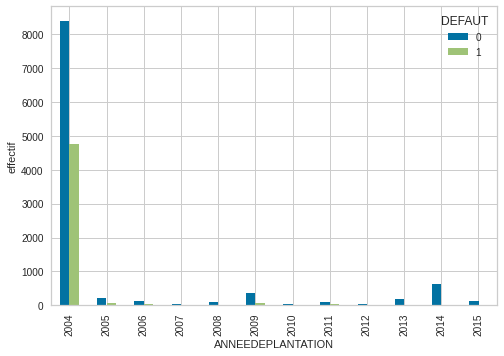

In [89]:
graphique(1)

In [47]:
descripQuali(1)
# il y'a 15375 - 15375 = 0 valeur manquente
# il y'a 12 âges différents pour ces arbres
# les arbres les plus vieux datent de 2004 et sont au nombre de 13150
# ces données sont très déséquilibrées

count     15375
unique       12
top        2004
freq      13150
Name: ANNEEDEPLANTATION, dtype: int64

<AxesSubplot:>

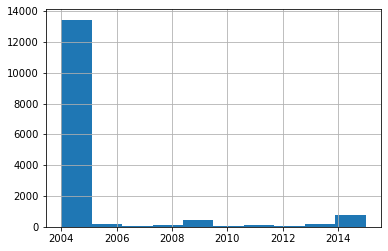

In [52]:
df.iloc[:,1].astype("category").hist()

In [26]:
contingence(1)
# les arbres les plus vieux datent de 2004, celà concernent 13150 arbres, parmi eux 4750 ont un défaut
# les arbres les plus jeunes datent de 2015, celà concernant 126 arbres, et n'ont aucun défaut
# les conditions du test de chi2 ne sont pas satisfait

DEFAUT,0,1
ANNEEDEPLANTATION,,
2004,8400,4750
2005,226,61
2006,130,36
2007,47,19
2008,107,14
2009,362,80
2010,34,8
2011,101,28
2012,34,3


### Année de réalisation de diagnostique : à conserver

<AxesSubplot:xlabel='ANNEEREALISATIONDIAGNOSTIC', ylabel='effectif'>

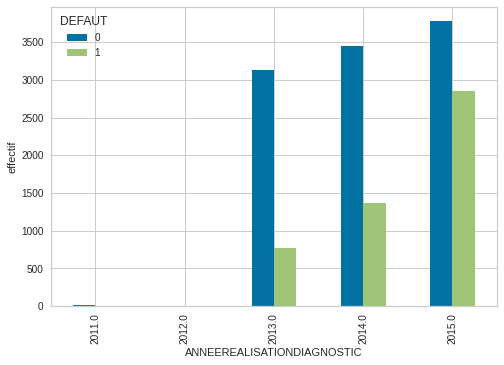

In [90]:
graphique(2)

In [54]:
descripQuali(2)
# il y'a 15375 - 15367 = 8 valeurs manquantes
# 5 années disctinctes ressortent des données
# l'année de réalisation de diagnostique la plus fréquente est 2015
# et concerne 6634 arbres 

count     15367.0
unique        5.0
top        2015.0
freq       6634.0
Name: ANNEEREALISATIONDIAGNOSTIC, dtype: float64

In [28]:
contingence(2)
# l'année la plus vieille de travaux de diagnostique est 2011, et a concerné 12 arbres
# l'année la plus récente de travaux de diagnostique est 2015, et a concerné 6634 arbres
# les conditions du test de chi2 ne sont pas satisfaites

DEFAUT,0,1
ANNEEREALISATIONDIAGNOSTIC,,
2011.0,8,4
2012.0,5,1
2013.0,3127,772
2014.0,3450,1366
2015.0,3779,2855


### Année préconisée pour les travaux de diagnostiques : à conserver

<AxesSubplot:xlabel='ANNEETRAVAUXPRECONISESDIAG', ylabel='effectif'>

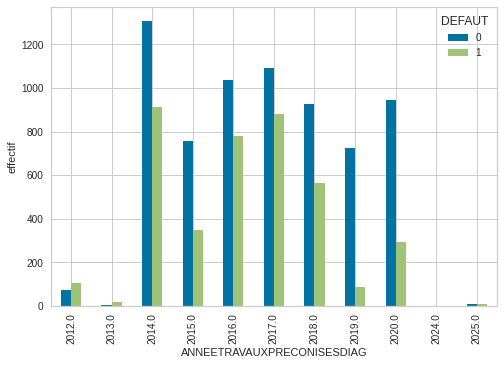

In [91]:
graphique(3)

In [56]:
descripQuali(3)
# il y'a des valeurs manquantes
# 11 années distinctes ressortent des données
# l'année la plus fréquente préconisée pour les travaux est 2014
# et concerne 2217 arbres

count     10864.0
unique       11.0
top        2014.0
freq       2217.0
Name: ANNEETRAVAUXPRECONISESDIAG, dtype: float64

In [33]:
contingence(3)
# travaux préconisés de diagnostiques jusqu'en 2025 pour 21 arbres
# les conditions pour le test de chi2 ne sont pas satisfaites

DEFAUT,0,1
ANNEETRAVAUXPRECONISESDIAG,,
2012.0,73,105
2013.0,2,19
2014.0,1306,911
2015.0,758,346
2016.0,1036,778
2017.0,1089,880
2018.0,924,565
2019.0,725,89
2020.0,944,292


### ID de l'arbre : à supprimer

In [36]:
descripQuali(4) 
# cette variable sera supprimée car modalité unique par observation

count        15375
unique       15375
top       ESP10000
freq             1
Name: CODE, dtype: object

### ID du parent de l'arbre : à supprimer

In [37]:
descripQuali(5)
# il y'a 15375 - 15375 = 0 valeur manquante
# il y'a 1141 ID du parent distinct
# l'ID du parent le plus fréquent est ESP995 et apparait 211 fois
# cette variable sera supprimée car nombre de modalité distinct trop élévé

count      15375
unique      1141
top       ESP995
freq         211
Name: CODE_PARENT, dtype: object

### Description de l'ID du parent de l'arbre : à supprimer car 

### redondant avec l'ID du parent de l'arbre qui est supprimé

In [153]:
descripQuali(6)

count                              15375
unique                              1141
top       Prc Echangeurs Bastion St Roch
freq                                 211
Name: CODE_PARENT_DESC, dtype: object

### DIAMETREARBREAUMETRE : à conserver

<AxesSubplot:xlabel='DIAMETREARBREAUNMETRE', ylabel='effectif'>

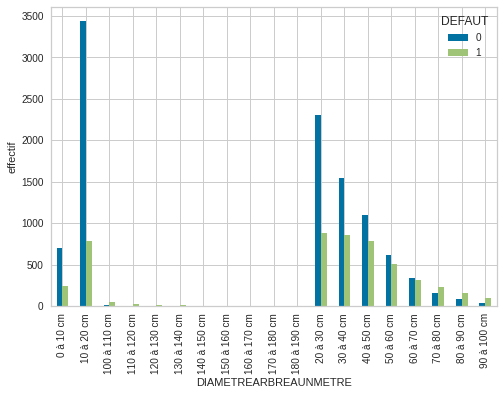

In [92]:
graphique(7)

In [58]:
descripQuali(7)
# il y'a des valeurs manquantes
# 19 tranches de diamètre ressortent des données
# 4221 arbres ont un diamètre entre 10 et 20 cm, et sont majoritairement représentés

count          15308
unique            19
top       10 à 20 cm
freq            4221
Name: DIAMETREARBREAUNMETRE, dtype: object

In [60]:
contingence(7)
# à partir de 80 cm et jusqu'0 190 cm de diamètre, les arbres de notre jeu de données
# ont majoritairement la modalité 1 (défaut), et en dessous de 80 cm, les arbres de notre jeu de
# données ont majoritairement la modalité 0 (pas de défaut)
# les conditions du test de chi2 ne sont pas satisfaites

DEFAUT,0,1
DIAMETREARBREAUNMETRE,,
0 à 10 cm,697,243
10 à 20 cm,3436,785
100 à 110 cm,18,47
110 à 120 cm,6,20
120 à 130 cm,1,13
130 à 140 cm,3,8
140 à 150 cm,0,4
150 à 160 cm,2,2
160 à 170 cm,0,5


### Espèce : à conserver

In [62]:
descripQuali(8)
# il y'a 226 espèces différentes dans notre jeu de données
# il y'a 15375 - 14357 = 1018 valeurs manquantes
# l'espèce la plus fréquente est acerifolia et apparait 2864 fois

count          14357
unique           226
top       acerifolia
freq            2864
Name: ESPECE, dtype: object

In [154]:
contingence(8)
# les conditions du test de chi2 ne sont pas satisfaites

DEFAUT,0,1
ESPECE,,
abies,62,17
acerifolia,1948,916
alaterne,1,0
alba,83,47
alnifolia fastigiata,1,0
...,...,...
virginiacus,0,1
virginiana,4,2
vulgaris,5,1


### FREQUENTATIONCIBLE : à conserver 

<AxesSubplot:xlabel='FREQUENTATIONCIBLE', ylabel='effectif'>

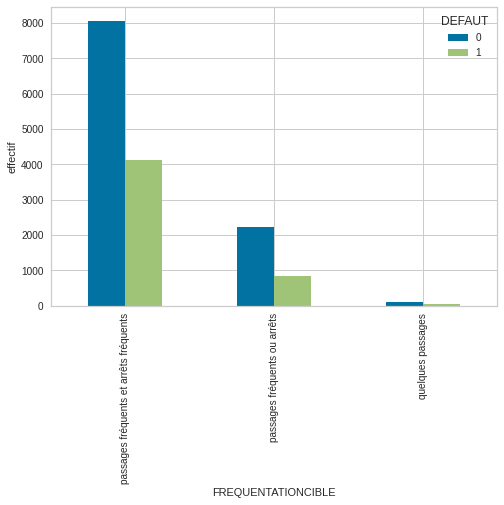

In [93]:
graphique(9)

In [64]:
descripQuali(9)
# il y'a 15375 - 15374 = 1 valeur manquante
# 3 modalités distinctes
# la plus fréquente modalité apparait 12164, donc données déséquilibrées

count                                      15374
unique                                         3
top       passages fréquents et arrêts fréquents
freq                                       12164
Name: FREQUENTATIONCIBLE, dtype: object

In [66]:
df.iloc[:,9].astype("category").value_counts()

passages fréquents et arrêts fréquents    12164
passages fréquents ou arrêts               3065
quelques passages                           145
Name: FREQUENTATIONCIBLE, dtype: int64

In [67]:
contingence(9)

DEFAUT,0,1
FREQUENTATIONCIBLE,,
passages fréquents et arrêts fréquents,8055,4109
passages fréquents ou arrêts,2217,848
quelques passages,102,43


In [68]:
testQuali(9)
# cette variable a un lien avec la cible

,Chi2 stattistic,P-value
FREQUENTATIONCIBLE,32.705053,1.072580e-08


### GENRE_BOTA : à conserver

In [69]:
descripQuali(10)
# il y'a 15375-15375 = 0 valeur manquante
# 107 modalités 
# le genre botanique le plus fréquent est Platanus
# et concerne 2982 arbres 

count        15375
unique         107
top       Platanus
freq          2982
Name: GENRE_BOTA, dtype: object

In [70]:
testQuali(10)

,Chi2 stattistic,P-value
GENRE_BOTA,719.673591,1.576290e-158


### IDENTIFIANTPLU : à supprimer

In [77]:
df.iloc[:,11].describe()
# cette variable sera supprimée car possède 15375 - 361 = 15014, soit près de 97 %

count    361.000000
mean      88.022161
std       63.244144
min        2.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      313.000000
Name: IDENTIFIANTPLU, dtype: float64

In [78]:
testQuant(11)

,F-stattistic,P-value
IDENTIFIANTPLU,69.211783,1.864363e-15


### INTITULEPROTECTIONPLU : à supprimer

<AxesSubplot:xlabel='INTITULEPROTECTIONPLU', ylabel='effectif'>

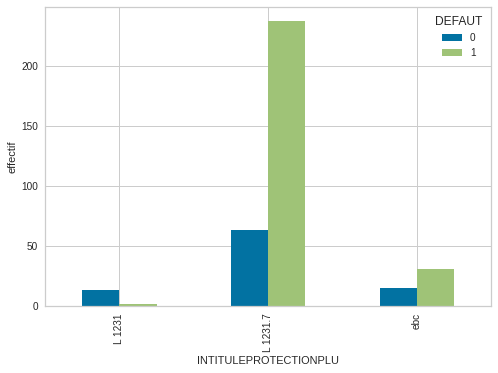

In [94]:
graphique(12)

In [79]:
descripQuali(12)
# cette variable a trop de valeurs manquantes
# soit 15375 - 361 = 15014, soit plus de 97 %
# la variable sera supprimée

count          361
unique           3
top       L 1231.7
freq           300
Name: INTITULEPROTECTIONPLU, dtype: object

### NOTEDIAGNOSTIC : à conserver

<AxesSubplot:xlabel='NOTEDIAGNOSTIC', ylabel='effectif'>

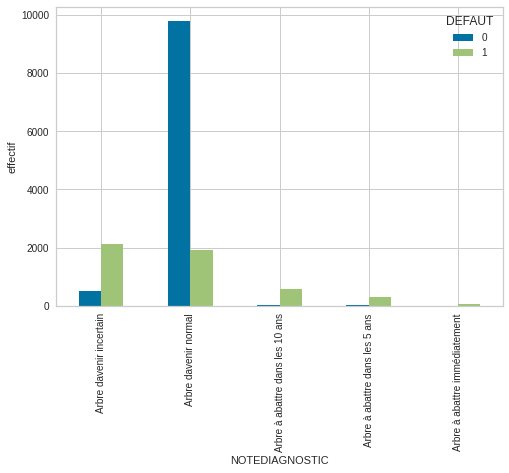

In [95]:
graphique(13)

In [82]:
descripQuali(13)

count                    15335
unique                       5
top       Arbre davenir normal
freq                     11716
Name: NOTEDIAGNOSTIC, dtype: object

In [83]:
df.iloc[:,13].value_counts()

Arbre davenir normal               11716
Arbre davenir incertain             2651
Arbre à abattre dans les 10 ans      592
Arbre à abattre dans les 5 ans       323
Arbre à abattre immédiatement         53
Name: NOTEDIAGNOSTIC, dtype: int64

In [155]:
contingence(13)

DEFAUT,0,1
NOTEDIAGNOSTIC,,
Arbre davenir incertain,511,2140
Arbre davenir normal,9784,1932
Arbre à abattre dans les 10 ans,25,567
Arbre à abattre dans les 5 ans,31,292
Arbre à abattre immédiatement,7,46


In [84]:
testQuali(13)

,Chi2 stattistic,P-value
NOTEDIAGNOSTIC,50.834074,1.005135e-12


### PRIORITEDERENOUVELLEMENT : à conserver

<AxesSubplot:xlabel='PRIORITEDERENOUVELLEMENT', ylabel='effectif'>

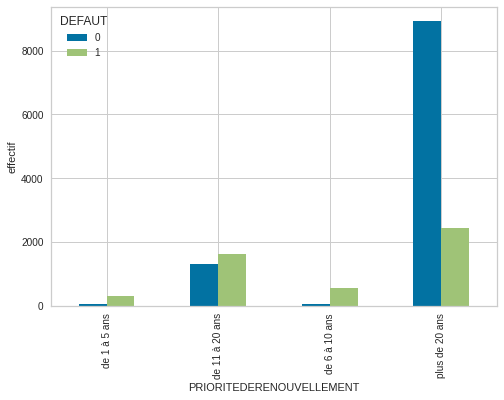

In [96]:
graphique(14)

In [85]:
descripQuali(14)

count              15248
unique                 4
top       plus de 20 ans
freq               11371
Name: PRIORITEDERENOUVELLEMENT, dtype: object

In [87]:
df.iloc[:,14].value_counts()

plus de 20 ans    11371
de 11 à 20 ans     2922
de 6 à 10 ans       612
de 1 à 5 ans        343
Name: PRIORITEDERENOUVELLEMENT, dtype: int64

In [156]:
contingence(14)

DEFAUT,0,1
PRIORITEDERENOUVELLEMENT,,
de 1 à 5 ans,39,304
de 11 à 20 ans,1316,1606
de 6 à 10 ans,51,561
plus de 20 ans,8932,2439


In [88]:
testQuali(14)

,Chi2 stattistic,P-value
PRIORITEDERENOUVELLEMENT,569.216043,8.314737e-126


### RAISONDEPLANTATION : à supprimer

<AxesSubplot:xlabel='RAISONDEPLANTATION', ylabel='effectif'>

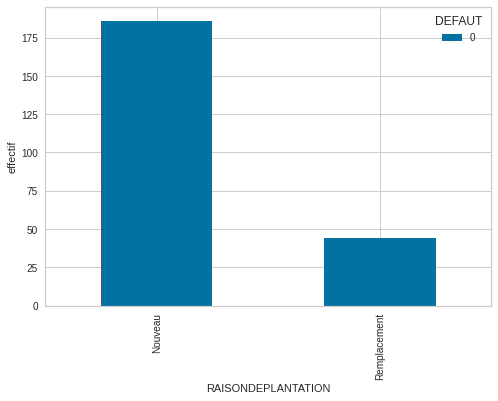

In [97]:
graphique(15)

In [89]:
descripQuali(15)
# cette variable a 15375 - 230 = 15145 valeurs manquantes, soit près de 98 %
# cette variable sera supprimée

count         230
unique          2
top       Nouveau
freq          186
Name: RAISONDEPLANTATION, dtype: object

### REMARQUES : à supprimer

In [90]:
descripQuali(16)
# cette variable sera supprimée car trop de modalités et trop de valeurs manquantes

count              4199
unique             1684
top       Erreur espèce
freq                138
Name: REMARQUES, dtype: object

### SOUS_CATEGORIE : à supprimer car redondante avec SOUS_CATEGORIE_DESC

<AxesSubplot:xlabel='SOUS_CATEGORIE', ylabel='effectif'>

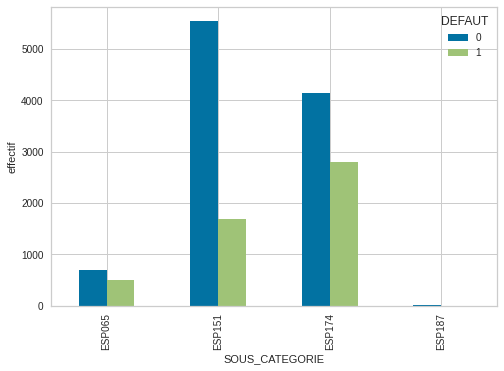

In [98]:
graphique(17)

In [91]:
descripQuali(17)

count      15375
unique         4
top       ESP151
freq        7235
Name: SOUS_CATEGORIE, dtype: object

### SOUS_CATEGORIE_DESC : à conserver

<AxesSubplot:xlabel='SOUS_CATEGORIE_DESC', ylabel='effectif'>

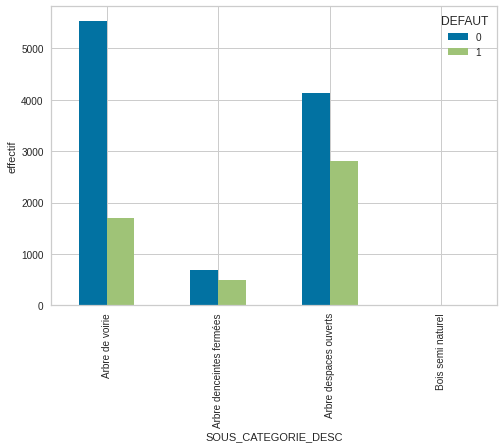

In [99]:
graphique(18)

In [94]:
descripQuali(18)

count               15375
unique                  4
top       Arbre de voirie
freq                 7235
Name: SOUS_CATEGORIE_DESC, dtype: object

In [95]:
contingence(18)
# les conditions du test de chi2 ne sont pas satisfaites

DEFAUT,0,1
SOUS_CATEGORIE_DESC,,
Arbre de voirie,5540,1695
Arbre denceintes fermées,691,495
Arbre despaces ouverts,4137,2807
Bois semi naturel,6,4


### STADEDEDEVELOPPEMENT : à conserver

<AxesSubplot:xlabel='STADEDEDEVELOPPEMENT', ylabel='effectif'>

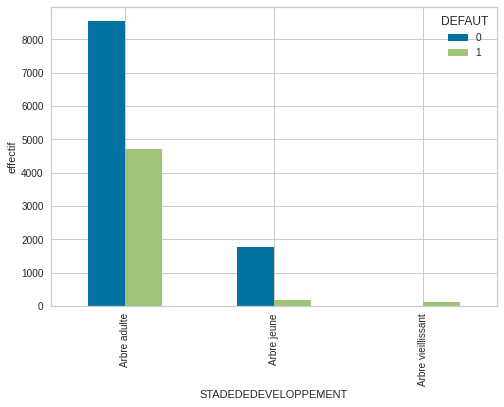

In [100]:
graphique(19)

In [97]:
descripQuali(19)

count            15324
unique               3
top       Arbre adulte
freq             13250
Name: STADEDEDEVELOPPEMENT, dtype: object

In [98]:
contingence(19)

DEFAUT,0,1
STADEDEDEVELOPPEMENT,,
Arbre adulte,8546,4704
Arbre jeune,1778,176
Arbre vieillissant,9,111


In [99]:
testQuali(19)

,Chi2 stattistic,P-value
STADEDEDEVELOPPEMENT,218.399835,2.020348e-49


### STADEDEVELOPPEMENTDIAG : à conserver

<AxesSubplot:xlabel='STADEDEVELOPPEMENTDIAG', ylabel='effectif'>

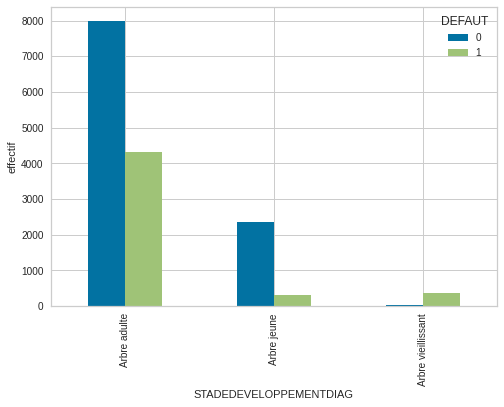

In [101]:
graphique(20)

In [100]:
descripQuali(20)

count            15362
unique               3
top       Arbre adulte
freq             12290
Name: STADEDEVELOPPEMENTDIAG, dtype: object

In [101]:
contingence(20)

DEFAUT,0,1
STADEDEVELOPPEMENTDIAG,,
Arbre adulte,7983,4307
Arbre jeune,2344,315
Arbre vieillissant,40,373


In [102]:
testQuali(20)

,Chi2 stattistic,P-value
STADEDEVELOPPEMENTDIAG,5.846786,0.015606


### TRAITEMENTCHENILLES : à supprimer

<AxesSubplot:xlabel='TRAITEMENTCHENILLES', ylabel='effectif'>

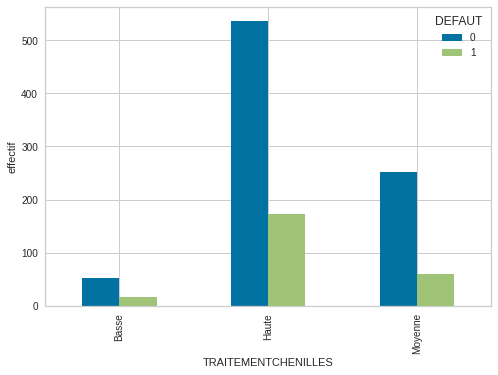

In [102]:
graphique(21)

In [103]:
descripQuali(21)

count      1088
unique        3
top       Haute
freq        709
Name: TRAITEMENTCHENILLES, dtype: object

In [105]:
contingence(21)

DEFAUT,0,1
TRAITEMENTCHENILLES,,
Basse,52,16
Haute,537,172
Moyenne,251,60


In [104]:
testQuali(21)

,Chi2 stattistic,P-value
TRAITEMENTCHENILLES,3.220853,0.072706


### TRAVAUXPRECONISESDIAG : à conserver

<AxesSubplot:xlabel='TRAVAUXPRECONISESDIAG', ylabel='effectif'>

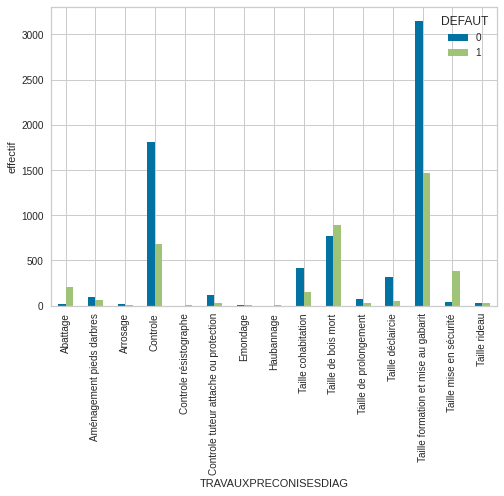

In [103]:
graphique(22)

In [106]:
descripQuali(22)

count                                   10850
unique                                     15
top       Taille formation et mise au gabarit
freq                                     4616
Name: TRAVAUXPRECONISESDIAG, dtype: object

In [107]:
contingence(22)

DEFAUT,0,1
TRAVAUXPRECONISESDIAG,,
Abattage,15,205
Aménagement pieds darbres,100,62
Arrosage,18,1
Controle,1810,683
Controle résistographe,0,7
Controle tuteur attache ou protection,112,32
Emondage,4,4
Haubannage,0,7
Taille cohabitation,411,153


### TROTTOIR : à conserver

<AxesSubplot:xlabel='TROTTOIR', ylabel='effectif'>

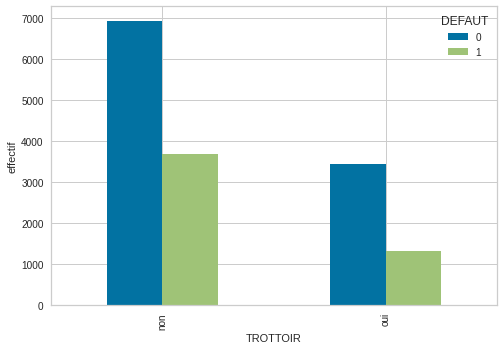

In [104]:
graphique(23)

In [109]:
descripQuali(23)

count     15375
unique        2
top         non
freq      10621
Name: TROTTOIR, dtype: object

In [110]:
contingence(23)

DEFAUT,0,1
TROTTOIR,,
non,6937,3684
oui,3437,1317


In [111]:
testQuali(23)

,Chi2 stattistic,P-value
TROTTOIR,50.404874,1.250832e-12


### TYPEIMPLANTATIONPLU : à supprimer

<AxesSubplot:xlabel='TYPEIMPLANTATIONPLU', ylabel='effectif'>

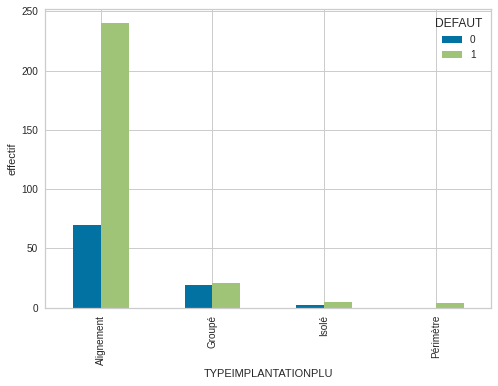

In [105]:
graphique(24)

In [112]:
descripQuali(24)
# possède 15375 - 361 = 15014 valeurs manquantes, soit près de 97% 

count            361
unique             4
top       Alignement
freq             310
Name: TYPEIMPLANTATIONPLU, dtype: object

In [114]:
contingence(24)
# les conditions du test de chi2 ne sont pas satisfaites

DEFAUT,0,1
TYPEIMPLANTATIONPLU,,
Alignement,70,240
Groupé,19,21
Isolé,2,5
Périmètre,0,4


### VARIETE : à supprimer

In [115]:
descripQuali(25)
# possède 15375 - 2163 = 13212 valeurs manquantes soit près de 85%

count          2163
unique           89
top       Austriaca
freq            558
Name: VARIETE, dtype: object

In [117]:
contingence(25)
# les conditions du test de chi2 ne sont pas satisfaites

DEFAUT,0,1
VARIETE,,
Allumi,5,3
Ardéchoise,1,0
Atropurpurea,24,22
Aureum,2,4
Austriaca,414,144
...,...,...
Vallis clausa,57,0
Variegata,0,2
Westhoff glorie,0,1


### VIGUEUR : à conserver

<AxesSubplot:xlabel='VIGUEUR', ylabel='effectif'>

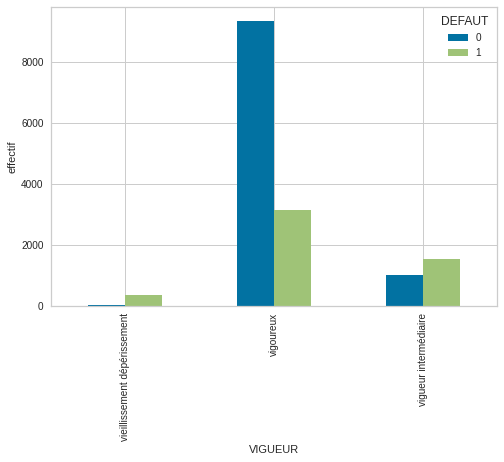

In [106]:
graphique(26)

In [118]:
descripQuali(26)

count         15364
unique            3
top       vigoureux
freq          12449
Name: VIGUEUR, dtype: object

In [157]:
contingence(26)

DEFAUT,0,1
VIGUEUR,,
vieillissement dépérissement,36,342
vigoureux,9330,3119
vigueur intermédiaire,999,1538


In [158]:
testQuali(26)

,Chi2 stattistic,P-value
VIGUEUR,62.465282,2.711834e-15


### Coord_x , Coord_y : à conserver

In [150]:
testQuant(27)

,F-stattistic,P-value
coord_x,101.557127,8.232011e-24


In [151]:
testQuant(28)

,F-stattistic,P-value
coord_y,35.519297,2.580571e-09


In [487]:
inProj = pyproj.Proj("+init=EPSG:3945")
outProj = pyproj.Proj("+init=EPSG:4326")

data_coord = df.iloc[:,27:29]
for m in range(data_coord.shape[0]):
    data_coord['coord_x'][m],data_coord['coord_y'][m] =  pyproj.transform(inProj, outProj, 
                                                                    float(df.iloc[m,27]), 
                                                                    float(df.iloc[m,28]))
data_coord

,coord_x,coord_y
0,5.740495,45.172728
1,5.713406,45.170622
2,5.711751,45.179604
3,5.726057,45.186023
4,5.711043,45.194799
...,...,...
15370,5.709891,45.167862
15371,5.717215,45.174753
15372,5.711792,45.193785
15373,5.731925,45.173410


In [488]:
# coord y : latitude
# coord x : longitude

y_centre = data_coord['coord_y'][0]
x_centre = data_coord['coord_x'][0]
c = folium.Map(location=[y_centre, x_centre])

p = data_coord.shape[0]

for m in range(1,100):
    y = data_coord['coord_y'][m]
    x = data_coord['coord_x'][m]
    if df['DEFAUT'][m] == 1:
        folium.Marker(location=[y,x],icon=folium.Icon(color="red")).add_to(c)
    if df['DEFAUT'][m] == 0:
        folium.Marker(location=[y,x],icon=folium.Icon(color="blue")).add_to(c)

c.save('cartesArbres.html')
c
# visulaisation des 100 premiers arbres, en rouge (avec défaut), en bleu (sans défaut)

# 2.  Prétraitement

In [180]:
def changementTypeDonnees(df): 
    
    df['ADR_SECTEUR'] = df['ADR_SECTEUR'].astype('object')
    df['ANNEEDEPLANTATION'] = df['ANNEEDEPLANTATION'].astype('object')
    df['ANNEEREALISATIONDIAGNOSTIC'] = df['ANNEEREALISATIONDIAGNOSTIC'].astype('object')
    df['ANNEETRAVAUXPRECONISESDIAG'] = df['ANNEETRAVAUXPRECONISESDIAG'].astype('object')
    df['DEFAUT'] = df['DEFAUT'].astype('object')
    df['Collet'] = df['Collet'].astype('object')
    df['Houppier'] = df['Houppier'].astype('object')
    df['Racine'] = df['Racine'].astype('object')
    df['Tronc'] = df['Tronc'].astype('object')
    return df


def supprimeVariable(df) :
    
    liste_variable = ['CODE','CODE_PARENT','CODE_PARENT_DESC','SOUS_CATEGORIE',
                      'RAISONDEPLANTATION', 'INTITULEPROTECTIONPLU','IDENTIFIANTPLU','TYPEIMPLANTATIONPLU',
                     'TRAITEMENTCHENILLES','VARIETE','REMARQUES']
    df = df.drop(liste_variable, axis=1)   
    return df


def encodage(df):
    enconder =  LabelEncoder()
    for colonnes in df.select_dtypes('object').columns:
        df[colonnes] = enconder.fit_transform(df[colonnes])
    return df
        

def preprocessing(df):
    df = changementTypeDonnees(df)
    df = supprimeVariable(df)
    df = df.dropna()
    df = encodage(df)
    return df

        

In [181]:
dfSortie = preprocessing(df)
dfSortie

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,STADEDEVELOPPEMENTDIAG,TRAVAUXPRECONISESDIAG,TROTTOIR,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,4,10,3,7,1,47,1,5,1,3,0,1,1,3,0,1,1.915371e+06,4.222837e+06,0,0,0,0,0
3,1,0,3,2,12,91,0,83,1,3,0,0,0,13,1,1,1.914187e+06,4.224275e+06,1,0,1,1,0
5,2,0,4,6,12,0,0,64,3,0,2,0,0,4,0,1,1.912600e+06,4.222098e+06,1,1,0,0,0
6,5,0,2,8,11,62,0,36,1,3,2,0,0,9,0,1,1.914850e+06,4.222165e+06,0,0,0,0,0
7,1,0,3,2,11,121,0,68,2,1,2,0,2,9,0,0,1.914403e+06,4.224092e+06,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15364,0,0,4,8,10,121,0,65,1,3,2,0,0,3,0,1,1.913418e+06,4.224540e+06,0,0,0,0,0
15367,2,0,2,0,12,121,0,65,3,0,2,0,0,3,0,1,1.912803e+06,4.221698e+06,0,0,0,0,0
15369,5,0,4,5,11,1,0,67,1,3,0,0,0,12,0,1,1.914704e+06,4.221612e+06,0,0,0,0,0
15371,3,0,3,2,12,1,0,67,1,3,0,0,0,10,0,1,1.913534e+06,4.223000e+06,0,0,0,0,0


In [112]:
dfSortie.shape

(9913, 23)

In [113]:
dfSortie["DEFAUT"].value_counts()

0    6343
1    3570
Name: DEFAUT, dtype: int64

# 3. Entrainement des modèles : classification uni-label

In [196]:
X = dfSortie.drop(['DEFAUT','Collet','Houppier','Racine','Tronc'],axis=1)
y = dfSortie['DEFAUT']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [183]:
def evaluation(model) :
    model = model.fit(X = X_train,y = y_train)
    ypred = model.predict(X_test)
    print("matrice de confusion ",confusion_matrix(y_test,ypred), sep="\n")
    print("rapport de classification ", classification_report(y_test,ypred),sep="\n")


def graphiqueModel(model):
    visualizer = ROCAUC(model, classes=["0", "1"])
    visualizer.fit(X_train, y_train)        
    visualizer.score(X_test, y_test)        
    visualizer.show()
    

def graphiqueValidation(model):
    visualizer = LearningCurve(model, scoring='accuracy',cv = 10,train_sizes=np.linspace(0.1,1,10))
    visualizer.fit(X_train, y_train)
    visualizer.show()
    

## Random Forest

In [148]:
RandomForest = RandomForestClassifier(n_estimators = 300,max_depth=10)

In [149]:
evaluation(RandomForest)

matrice de confusion 
[[1802   85]
 [ 261  826]]
rapport de classification 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1887
           1       0.91      0.76      0.83      1087

    accuracy                           0.88      2974
   macro avg       0.89      0.86      0.87      2974
weighted avg       0.89      0.88      0.88      2974



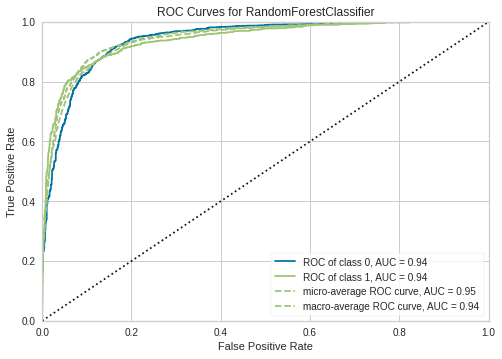

In [150]:
graphiqueModel(RandomForest)

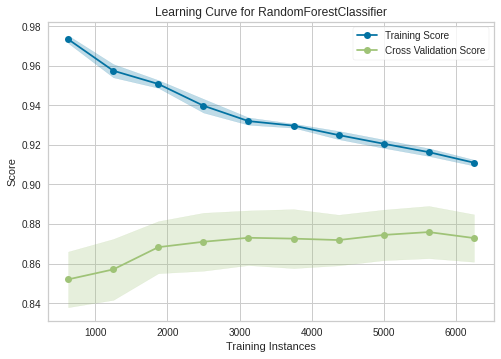

In [151]:
graphiqueValidation(RandomForest)

<AxesSubplot:>

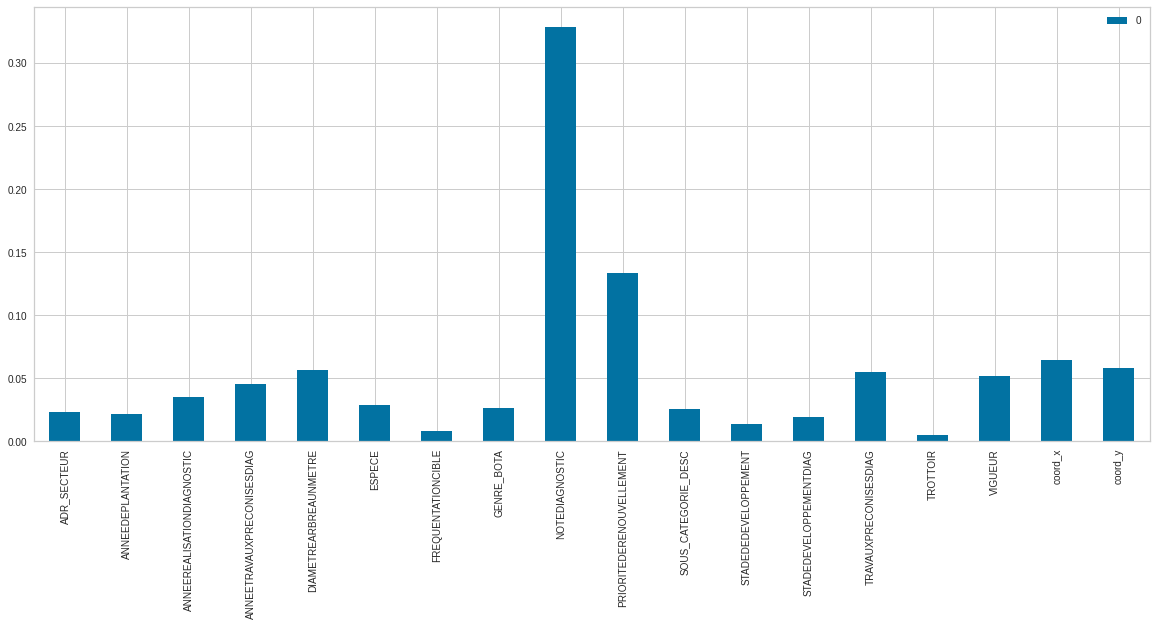

[10:02:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:02:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:02:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [175]:
pd.DataFrame(RandomForest.feature_importances_, index=X_train.columns).plot.bar(figsize=(20,8))

## Adaboost

In [152]:
AdaBoost = AdaBoostClassifier()

In [153]:
evaluation(AdaBoost)

matrice de confusion 
[[1762  125]
 [ 339  748]]
rapport de classification 
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1887
           1       0.86      0.69      0.76      1087

    accuracy                           0.84      2974
   macro avg       0.85      0.81      0.82      2974
weighted avg       0.85      0.84      0.84      2974



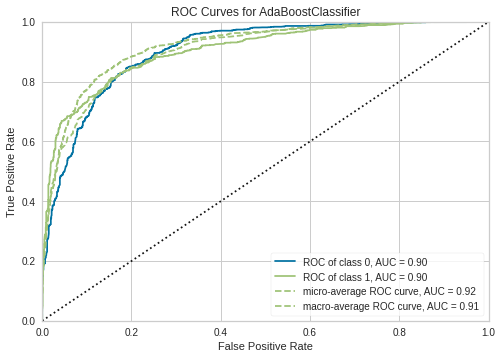

In [155]:
graphiqueModel(AdaBoost)

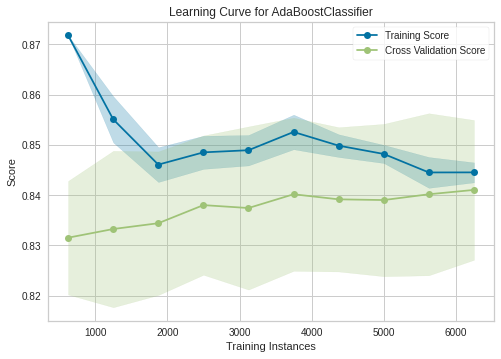

In [154]:
graphiqueValidation(AdaBoost)

## SVM

In [156]:
SVM = make_pipeline(StandardScaler(),SVC())

In [157]:
evaluation(SVM)

matrice de confusion 
[[1769  118]
 [ 279  808]]
rapport de classification 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1887
           1       0.87      0.74      0.80      1087

    accuracy                           0.87      2974
   macro avg       0.87      0.84      0.85      2974
weighted avg       0.87      0.87      0.86      2974



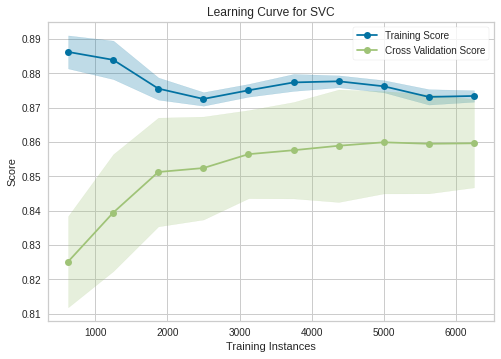

In [159]:
graphiqueValidation(SVM)

## KNN

In [184]:
KNN = make_pipeline(StandardScaler(),KNeighborsClassifier())

In [185]:
evaluation(KNN)

matrice de confusion 
[[1717  170]
 [ 283  804]]
rapport de classification 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1887
           1       0.83      0.74      0.78      1087

    accuracy                           0.85      2974
   macro avg       0.84      0.82      0.83      2974
weighted avg       0.85      0.85      0.85      2974



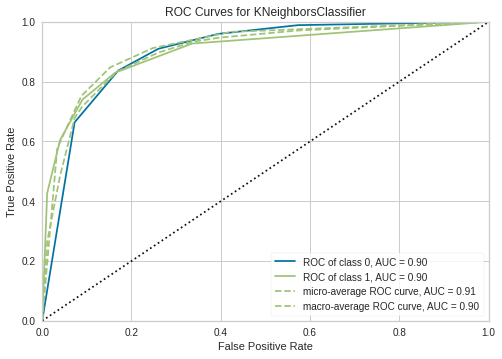

In [169]:
graphiqueModel(KNN)

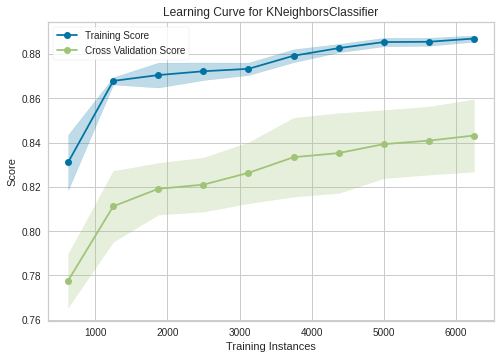

In [170]:
graphiqueValidation(KNN)

## Xgboost

In [171]:
Xgboost = XGBClassifier()

In [186]:
evaluation(Xgboost)

[10:24:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
matrice de confusion 
[[1780  107]
 [ 210  877]]
rapport de classification 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1887
           1       0.89      0.81      0.85      1087

    accuracy                           0.89      2974
   macro avg       0.89      0.88      0.88      2974
weighted avg       0.89      0.89      0.89      2974



[10:02:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


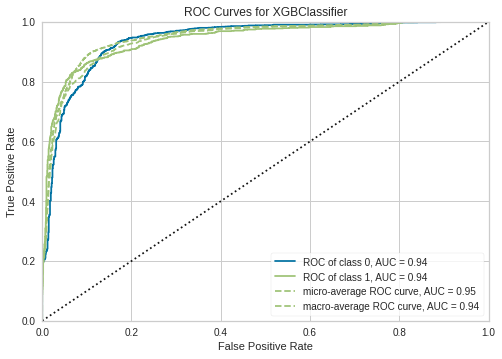

In [173]:
graphiqueModel(Xgboost)

/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a futur

/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following:

/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following:

/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following:

/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following:

/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following:

/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following:

/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  

/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following:

/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/moudilamarcel/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following:

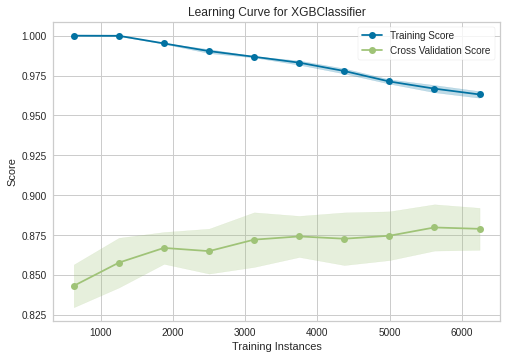

In [174]:
graphiqueValidation(Xgboost)


## choix du meilleur modèle : Xgboost

Text(0.5, 1.0, 'importance des variables pour Xgboost Classifier')

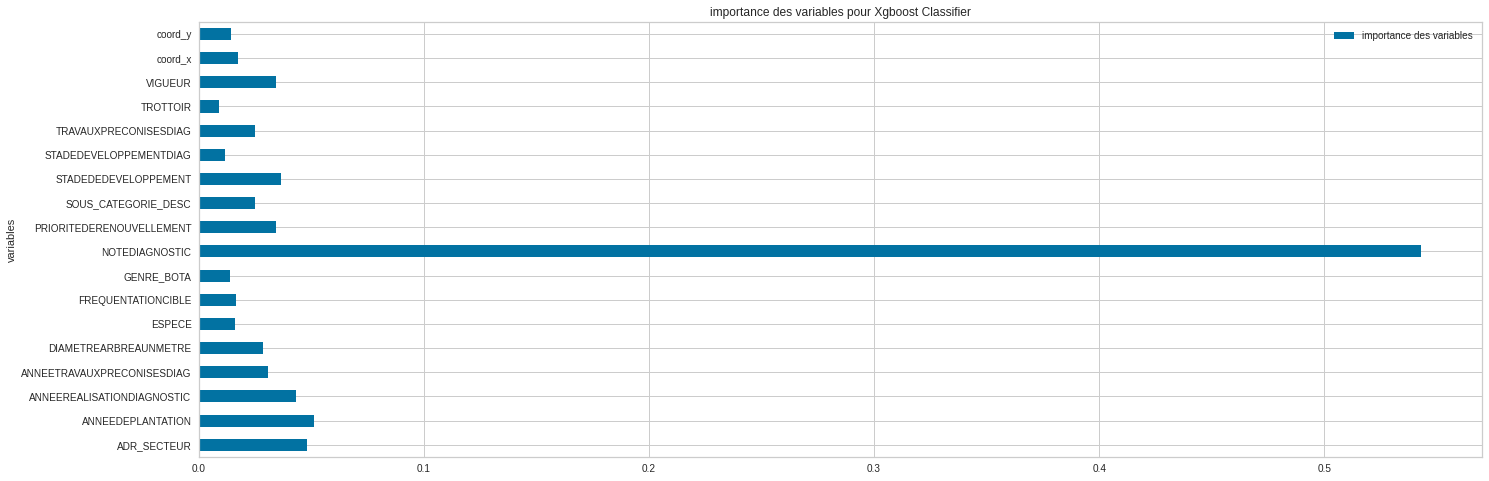

In [190]:
fig, ax = plt.subplots(figsize=(23,8))
(pd.DataFrame({"variables" : X_train.columns, "importance des variables" : Xgboost.feature_importances_})
.set_index("variables")
.plot.barh(ax=ax)
)
plt.title("importance des variables pour Xgboost Classifier")

# 4. Entrainement des modèles : classification multi-label

In [433]:
data = dfSortie
X = data.drop(['DEFAUT','Collet','Houppier','Racine','Tronc'],axis=1)
y = data[['Collet','Houppier','Racine','Tronc']]     

In [434]:
X.head()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,STADEDEVELOPPEMENTDIAG,TRAVAUXPRECONISESDIAG,TROTTOIR,VIGUEUR,coord_x,coord_y
0,4,10,3,7,1,47,1,5,1,3,0,1,1,3,0,1,1.915371e+06,4.222837e+06
3,1,0,3,2,12,91,0,83,1,3,0,0,0,13,1,1,1.914187e+06,4.224275e+06
5,2,0,4,6,12,0,0,64,3,0,2,0,0,4,0,1,1.912600e+06,4.222098e+06
6,5,0,2,8,11,62,0,36,1,3,2,0,0,9,0,1,1.914850e+06,4.222165e+06
7,1,0,3,2,11,121,0,68,2,1,2,0,2,9,0,0,1.914403e+06,4.224092e+06


In [435]:
y.head()

,Collet,Houppier,Racine,Tronc
0,0,0,0,0
3,0,1,1,0
5,1,0,0,0
6,0,0,0,0
7,0,1,0,0


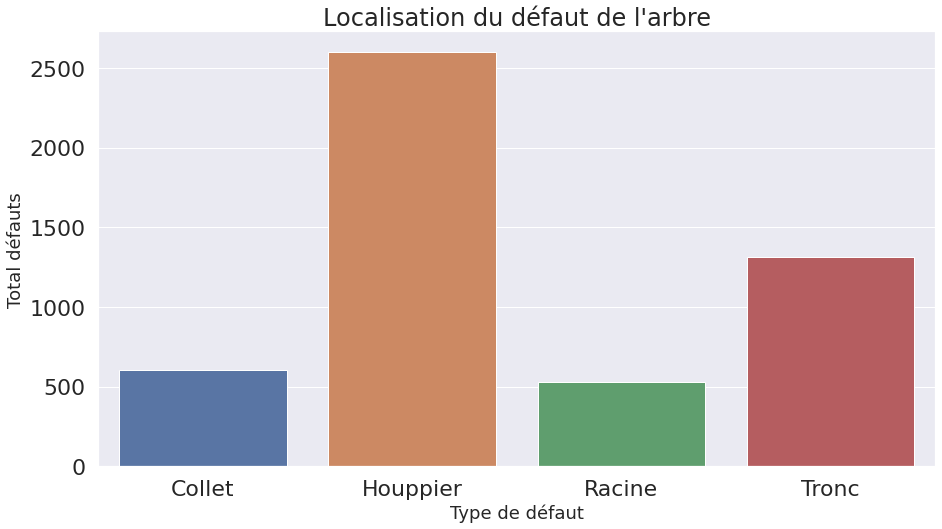

In [436]:
categories = data.iloc[:,19:].columns.values
sns.set(font_scale = 2)
plt.figure(figsize =(15,8))

ax = sns.barplot(categories,data.iloc[:,19:].sum().values)

plt.title("Localisation du défaut de l'arbre",fontsize = 24)
plt.ylabel("Total défauts",fontsize=18)
plt.xlabel("Type de défaut",fontsize=18)

plt.show()


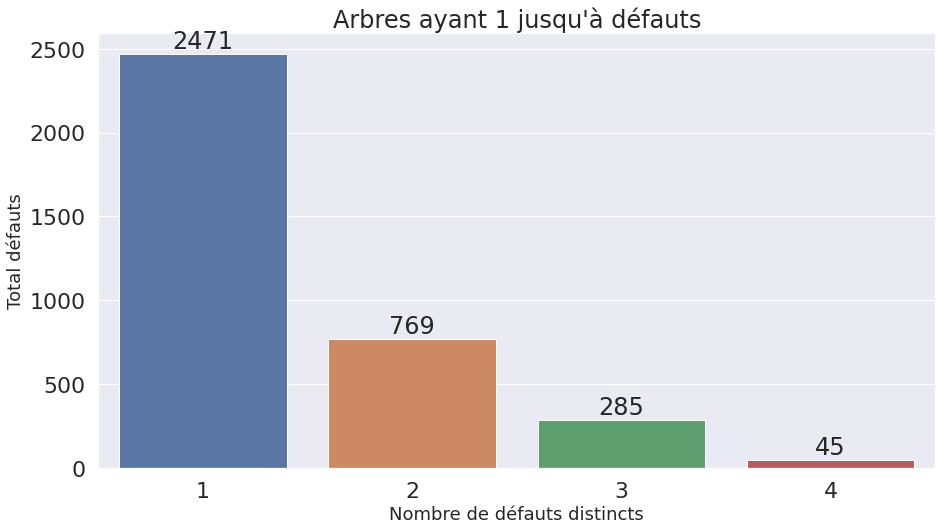

In [437]:
rowSums = data.iloc[:,19:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Arbres ayant 1 jusqu'à défauts")
plt.ylabel("Total défauts",fontsize=18)
plt.xlabel("Nombre de défauts distincts",fontsize=18)

rects = ax.patches
defauts = multiLabel_counts.values
for rect, defaut in zip(rects,defauts):
    height = rect.get_height()
    ax.text(rect.get_x()+ rect.get_width()/2, height + 5, defaut, ha='center',va = 'bottom')

plt.show()

In [438]:
# corrélations
X.corr()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,STADEDEVELOPPEMENTDIAG,TRAVAUXPRECONISESDIAG,TROTTOIR,VIGUEUR,coord_x,coord_y
ADR_SECTEUR,1.000000,-0.133467,0.020518,-0.008904,-0.014651,0.007332,0.042706,-0.088780,-0.036907,0.094990,0.121254,-0.102566,-0.063693,0.096543,-0.010495,-0.061890,0.498449,-0.765273
ANNEEDEPLANTATION,-0.133467,1.000000,-0.090732,0.400296,-0.489211,0.076613,0.476865,0.011643,0.048643,0.208348,-0.184613,0.739856,0.493167,-0.407594,0.162210,-0.123593,-0.189197,0.157586
ANNEEREALISATIONDIAGNOSTIC,0.020518,-0.090732,1.000000,0.381770,-0.131037,0.106954,-0.045582,-0.126010,-0.036213,0.021935,0.053994,-0.040265,0.061192,0.199188,0.070287,0.013318,0.162967,0.140403
ANNEETRAVAUXPRECONISESDIAG,-0.008904,0.400296,0.381770,1.000000,-0.365292,0.074653,0.296951,-0.063369,-0.096423,0.210323,-0.008695,0.304428,0.220986,0.027170,0.109548,-0.104636,0.061659,0.141140
DIAMETREARBREAUNMETRE,-0.014651,-0.489211,-0.131037,-0.365292,1.000000,-0.226897,-0.225036,0.174890,0.012103,-0.201907,0.149743,-0.403638,-0.373292,0.049744,-0.174684,0.122467,0.094381,0.005083
ESPECE,0.007332,0.076613,0.106954,0.074653,-0.226897,1.000000,0.029079,-0.119211,-0.084813,-0.035432,0.114404,0.056302,0.075733,0.010794,0.035322,-0.025871,0.015674,0.010185
FREQUENTATIONCIBLE,0.042706,0.476865,-0.045582,0.296951,-0.225036,0.029079,1.000000,-0.041645,0.022765,0.063150,0.154757,0.356242,0.230026,-0.331728,-0.085877,-0.057691,0.016677,0.080569
GENRE_BOTA,-0.088780,0.011643,-0.126010,-0.063369,0.174890,-0.119211,-0.041645,1.000000,0.080150,-0.017370,-0.141905,0.019170,-0.002174,-0.042114,0.018041,0.009536,-0.067312,0.093918
NOTEDIAGNOSTIC,-0.036907,0.048643,-0.036213,-0.096423,0.012103,-0.084813,0.022765,0.080150,1.000000,-0.116096,-0.103860,0.099073,0.116504,-0.218366,0.040358,-0.138405,-0.113933,-0.007570
PRIORITEDERENOUVELLEMENT,0.094990,0.208348,0.021935,0.210323,-0.201907,-0.035432,0.063150,-0.017370,-0.116096,1.000000,-0.167044,0.126596,0.005972,0.097884,0.081922,-0.302540,-0.075170,-0.123185


In [439]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [440]:
X_train.shape

(6939, 18)

In [441]:
X_test.shape

(2974, 18)

In [442]:
y_train.shape

(6939, 4)

In [443]:
y_test.shape

(2974, 4)

## RandomForest

In [466]:
RF = MultiOutputClassifier(RandomForestClassifier(n_estimators = 500,max_depth=10))
RF.fit(X_train,y_train)
ypred_RF = RF.predict(X_test)
ypred_RF

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0]])

In [467]:
# accuracy
RF.score(X_test,y_test)

0.7562205783456624

In [468]:
# precision
precision_score(y_test,ypred_RF,average='macro')

0.7841539414322782

In [469]:
# rappel
recall_score(y_test,ypred_RF,average='macro')

0.34165636023791307

## Adaboost

In [470]:
ADB = MultiOutputClassifier(AdaBoostClassifier())
ADB.fit(X_train,y_train)
ypred_ADB = ADB.predict(X_test)
ypred_ADB

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0]])

In [471]:
# accuracy
ADB.score(X_test,y_test)

0.7125084061869535

In [472]:
# precision
precision_score(y_test,ypred_ADB,average='macro')

0.5619449703255716

In [473]:
# rappel
recall_score(y_test,ypred_ADB,average='macro')

0.2908803648843376

## Xgboost

In [477]:
XGB = RF = MultiOutputClassifier(XGBClassifier(n_estimators = 500,max_depth=10))
XGB.fit(X_train,y_train)
ypred_XGB = XGB.predict(X_test)
ypred_XGB

[10:03:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:03:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:03:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:03:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

array([[0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0]])

In [478]:
# accuracy
XGB.score(X_test,y_test)

0.7481506388702085

In [479]:
# precision
precision_score(y_test,ypred_XGB,average='macro')

0.6393082174742651

In [480]:
# rappel
recall_score(y_test,ypred_XGB,average='macro')

0.4633095179938121